# Whelks and lobsters -- context operator

## The system

In [1]:
R.<x,y> = QQ[]

In [2]:
from ulbc import *

In [3]:
us = [x,y]
k=RIF(0.8); b=RIF(0.6); c=RIF(0.3); e=RIF(0.05); f=RIF(2)
vf = vector([b*x*(RIF(1)-x) - c*x*(k-x)*y,
            -e*y*(RIF(1)+y)+f*x*(k-x)*y])
v0 = [RIF(0.5), RIF(2.0)]
v1 = [RIF(0.4), RIF(2.5)]
v2 = [RIF(1,1.2), RIF(4,6)]

In [4]:
v3 = [RIF(1,1.1), RIF(4,5)]

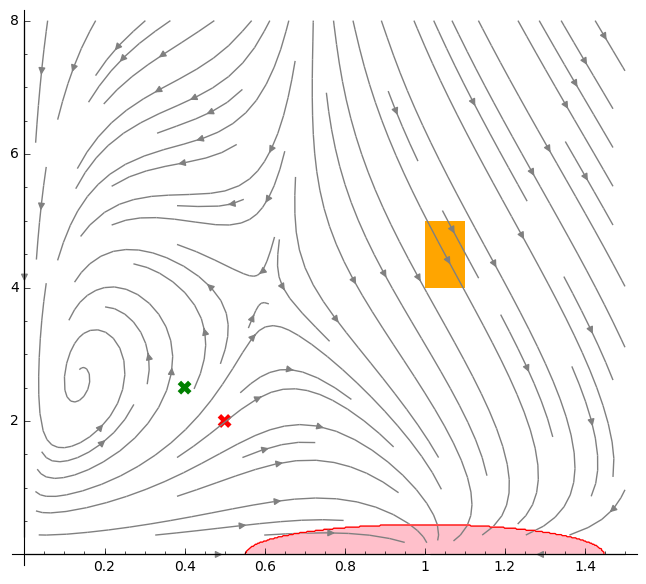

In [5]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + point(v0, size=100, marker='X', color='red')\
    + point(v1, size=100, marker='X', color='green')\
    + polygon([(v3[0].lower(), v3[1].lower()),
               (v3[0].lower(), v3[1].upper()),
               (v3[0].upper(), v3[1].upper()),
               (v3[0].upper(), v3[1].lower())],
              color='orange')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()

## Simple signal

In [6]:
P = Atomic((x - 1)^2 + y^2 - 0.2)

Computed 501 flowpipes in 1.69430828094 sec
Prepared for plotting in 0.891817569733 sec
domain = [0.00000000000000000 .. 5.0000000000000009]
roots = [[1.4278780504788686 .. 2.6199999999999993]]
  J  = [0.00000000000000000 .. 1.4278780504788687]
f(J) = [-0.30143396690182523 .. 25.180516586224702]
  J  = [2.6199999999999992 .. 5.0000000000000009]
f(J) = [-0.35271263287245075 .. 0.085166001459252100]
Monitored signal 0.177392244339 sec


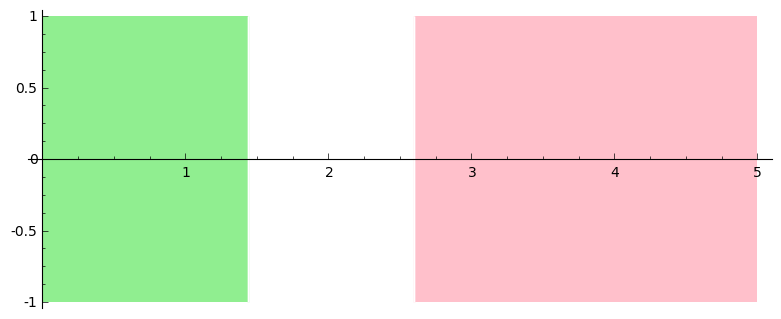

In [7]:
sig = P.signal_for_system(vf, v3, 5, order=5, step=0.01,
                    precondition=1,
                    estimation=1e-3,
                    integrationScheme=2,
                    cutoff_threshold=1e-5)
sig.plot()

Computed 501 flowpipes in 1.72584104538 sec
Prepared for plotting in 0.85197687149 sec
domain = [0.00000000000000000 .. 5.0000000000000009]
roots = [[1.6679767143790633 .. 1.6699999999999796], 
 [1.6741848470338891 .. 2.3199999999999870]]
  J  = [0.00000000000000000 .. 1.6679767143790634]
f(J) = [-0.45374930218095023 .. 25.180516586224702]
  J  = [1.6699999999999795 .. 1.6741848470338892]
f(J) = [-0.13465014631767772 .. 0.70870216053617264]
  J  = [2.3199999999999869 .. 5.0000000000000009]
f(J) = [-0.38483994948820572 .. 0.20154112898465460]
Monitored signal 0.641319274902 sec


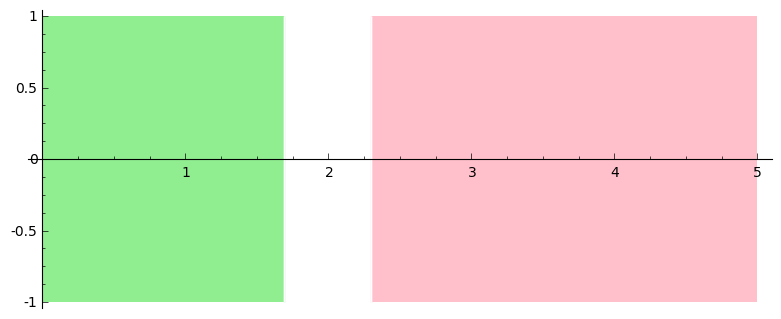

In [8]:
sig = P.signal_for_system(vf, v3, 5, order=5, step=0.01,
                    precondition=1,
                    estimation=1e-3,
                    integrationScheme=2,
                    cutoff_threshold=1e-5,
                    symbolic_composition=True)
sig.plot()

Computed 66 flowpipes in 0.283575057983 sec
Prepared for plotting in 0.16140460968 sec
domain = [0.00000000000000000 .. 5.0000000000000000]
roots = [[1.5148129129113101 .. 1.5184870921717833], 
 [1.5670945148659654 .. 2.3236493583492055]]
  J  = [0.00000000000000000 .. 1.5148129129113102]
f(J) = [-0.38936478741444248 .. 25.183405123894769]
  J  = [1.5184870921717832 .. 1.5670945148659655]
f(J) = [-0.10686431021187729 .. 1.0494941567509926]
  J  = [2.3236493583492054 .. 5.0000000000000000]
f(J) = [-0.38008279631511733 .. 0.19787675805213765]
Monitored signal 0.10173201561 sec


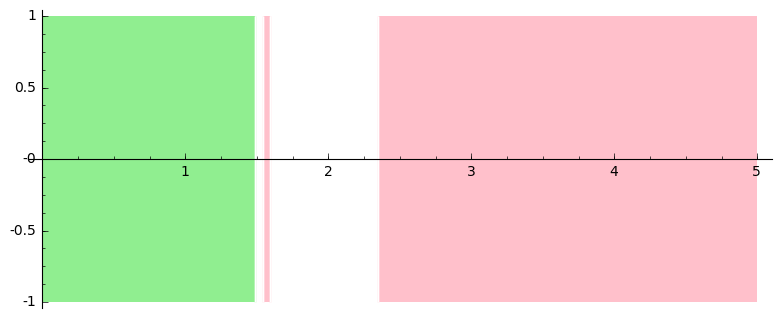

In [9]:
sig = P.signal_for_system(vf, v3, 5, order=5, step=(0.01, 0.5),
                    precondition=1,
                    estimation=1e-3,
                    integrationScheme=2,
                    cutoff_threshold=1e-5,
                    symbolic_composition=True,
                    verbosity=3)
sig.plot()

Computed 66 flowpipes in 0.275894165039 sec
Prepared for plotting in 0.176097631454 sec
domain = [0.00000000000000000 .. 4.9999999999999992]
roots = [[0.10343750000000001 .. 0.76510436099420421], 
 [2.4878883481319027 .. 3.0546524239379834]]
  J  = [0.00000000000000000 .. 0.10343750000000002]
f(J) = [-0.15000118745448177 .. -0.0050948730237294626]
  J  = [0.76510436099420420 .. 2.4878883481319028]
f(J) = [0.00081812236518552516 .. 0.23331653224762694]
  J  = [3.0546524239379833 .. 4.9999999999999992]
f(J) = [-0.11440814829967195 .. 0.0013367637732706328]
Monitored signal 0.0272200107574 sec


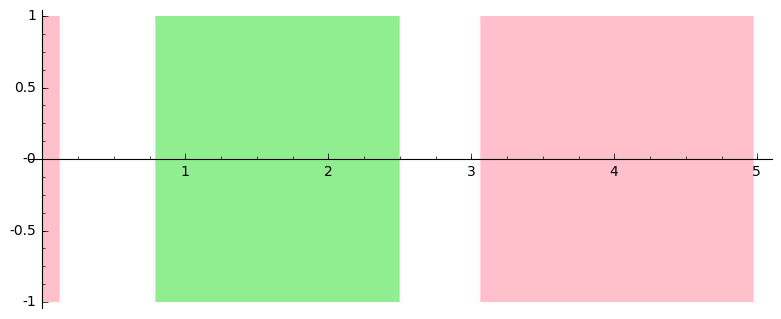

In [10]:
sig2 = Atomic(x - 1.15).signal_for_system(vf, v3, 5, order=5, step=(0.01, 0.5),
                                   precondition=1,
                                   estimation=1e-3,
                                   integrationScheme=2,
                                   cutoff_threshold=1e-5)
sig2.plot()

Computed 66 flowpipes in 0.283189296722 sec
Prepared for plotting in 0.158943653107 sec
domain = [0.00000000000000000 .. 4.9999999999999992]
roots = [[0.10633378976545118 .. 0.73619713464944559], 
 [2.5906952982047264 .. 2.9719646571903074]]
  J  = [0.00000000000000000 .. 0.10633378976545119]
f(J) = [-0.15000118745448177 .. -0.0039173498573150666]
  J  = [0.73619713464944558 .. 2.5906952982047265]
f(J) = [-0.0058481814200814775 .. 0.23331653224762694]
  J  = [2.9719646571903073 .. 4.9999999999999992]
f(J) = [-0.11440814829967195 .. 0.0061857555040394364]
Monitored signal 0.0248520374298 sec


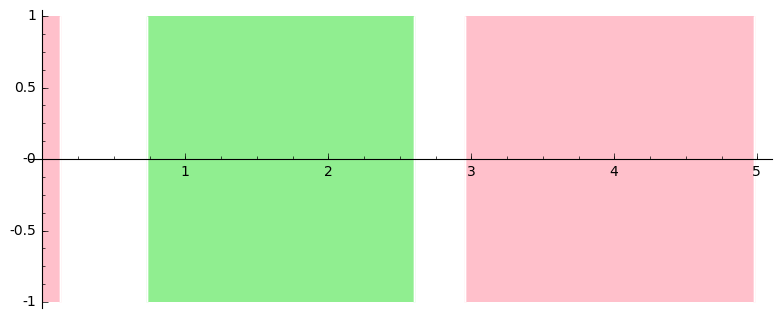

In [11]:
sig2 = Atomic(x - 1.15).signal_for_system(vf, v3, 5, order=5, step=(0.01, 0.5),
                                   precondition=1,
                                   estimation=1e-3,
                                   integrationScheme=2,
                                   cutoff_threshold=1e-5,
                                   symbolic_composition=True)
sig2.plot()

In [12]:
reach = Reach(vf, v3, 10,
              order=5, step=(0.01, 0.5),
              precondition=1,
              estimation=1e-3,
              integrationScheme=2,
              cutoff_threshold=1e-7)

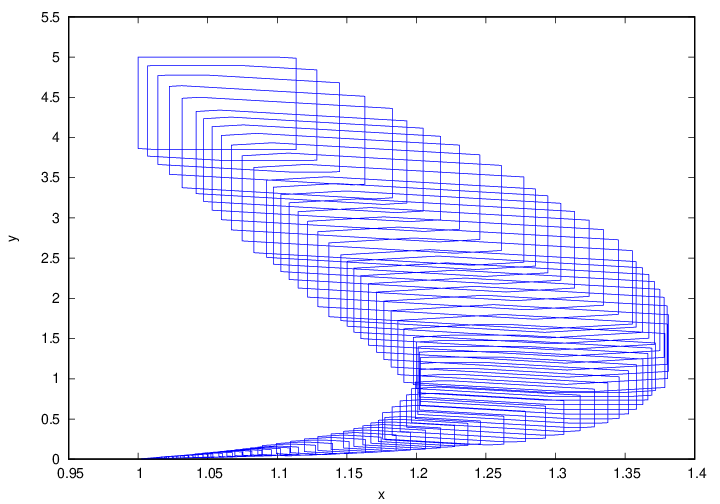

In [13]:
reach.wplot('x', 'y')

### Polynomial plot

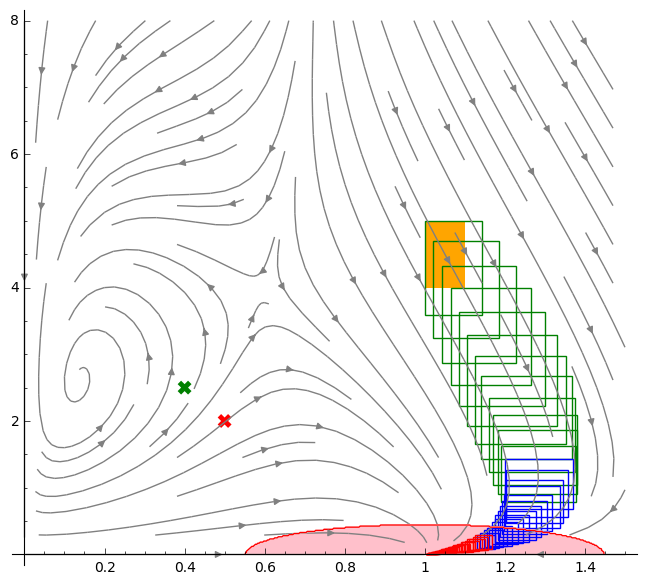

In [14]:
p + reach.sage_interval_plot('x', 'y',
                             poly=(x - 1)^2 + y^2 - 0.2,
                             aspect_ratio='automatic')

In [15]:
reach.symbolic_composition = True

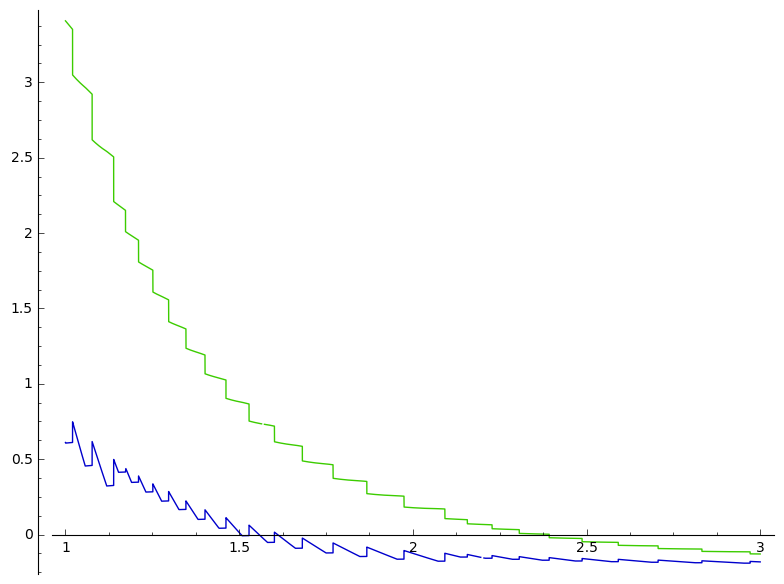

In [16]:
p1 = reach.sage_plot((x - 1)^2 + y^2 - 0.2, (1, 3))
p1

In [17]:
roots = reach.roots(P.p, P.dpdt(vf), verbosity=10)

reached detect roots t=0.0 + [0.0..0.03125]
reached detect roots t=0.03125 + [0.0..0.034375]
reached detect roots t=0.065625 + [0.0..0.0378125]
reached detect roots t=0.1034375 + [0.0..0.04159375]
reached detect roots t=0.14503125 + [0.0..0.045753125]
reached detect roots t=0.190784375 + [0.0..0.02516421875]
reached detect roots t=0.21594859375 + [0.0..0.027680640625]
reached detect roots t=0.243629234375 + [0.0..0.0304487046875]
reached detect roots t=0.274077939063 + [0.0..0.0334935751563]
reached detect roots t=0.307571514219 + [0.0..0.0368429326719]
reached detect roots t=0.344414446891 + [0.0..0.0405272259391]
reached detect roots t=0.38494167283 + [0.0..0.044579948533]
reached detect roots t=0.429521621363 + [0.0..0.0245189716931]
reached detect roots t=0.454040593056 + [0.0..0.0269708688624]
reached detect roots t=0.481011461918 + [0.0..0.0296679557487]
reached detect roots t=0.510679417667 + [0.0..0.0326347513236]
reached detect roots t=0.54331416899 + [0.0..0.0358982264559]
re

limit_output extension: Maximum message size of 10000 exceeded with 10411 characters

In [18]:
[root.str(style='brackets') for root in roots]

['[1.5148465335854002 .. 1.5184870921717868]',
 '[1.5670202576799117 .. 2.3824775508894854]']

In [19]:
reach.symbolic_composition = False

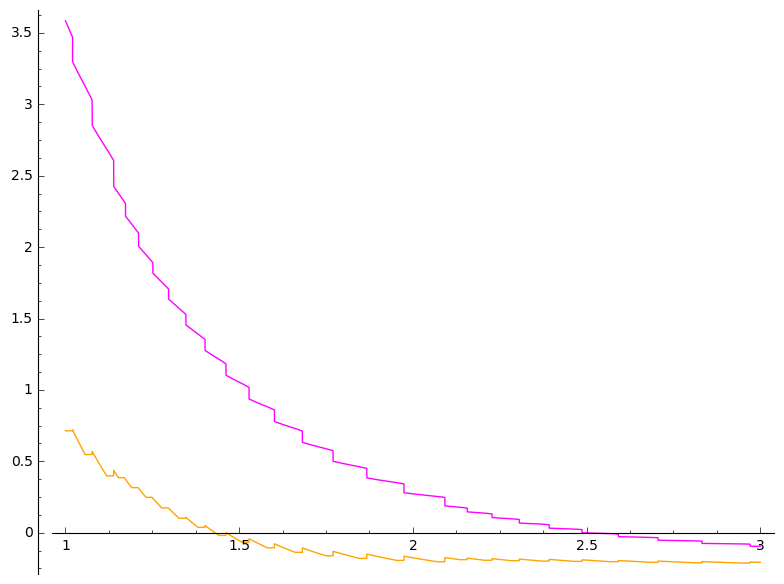

In [20]:
p2 = reach.sage_plot((x - 1)^2 + y^2 - 0.2, (1, 3),
                     color=['orange', 'magenta'])
p2

In [21]:
roots = reach.roots(P.p, P.dpdt(vf))

In [22]:
[root.str(style='brackets') for root in roots]

['[1.4390681573910157 .. 2.4772209432575254]']

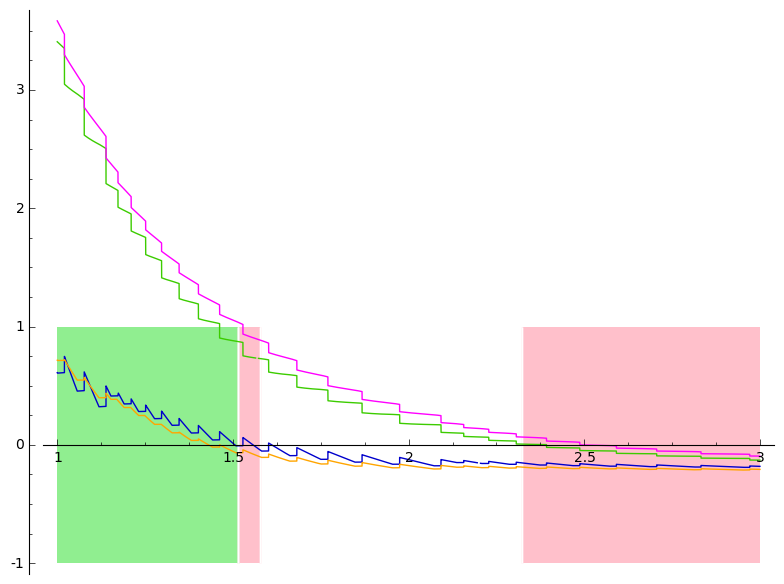

In [23]:
p1 + p2 + sig.to_domain(RIF(1, 3)).plot(aspect_ratio='automatic')

### $x \ge 1.15$

In [24]:
q = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + polygon([(v3[0].lower(), v3[1].lower()),
               (v3[0].lower(), v3[1].upper()),
               (v3[0].upper(), v3[1].upper()),
               (v3[0].upper(), v3[1].lower())],
              color='orange')\
    + region_plot((lambda x, y: x - 1.15 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
q.set_aspect_ratio(1/6)

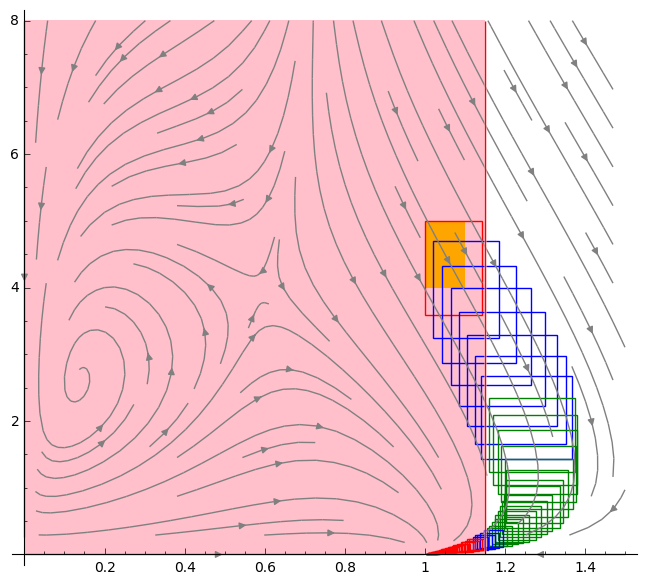

In [25]:
q + reach.sage_interval_plot('x', 'y',
                             poly=x - 1.15,
                             aspect_ratio='automatic')

In [26]:
reach.symbolic_composition = True

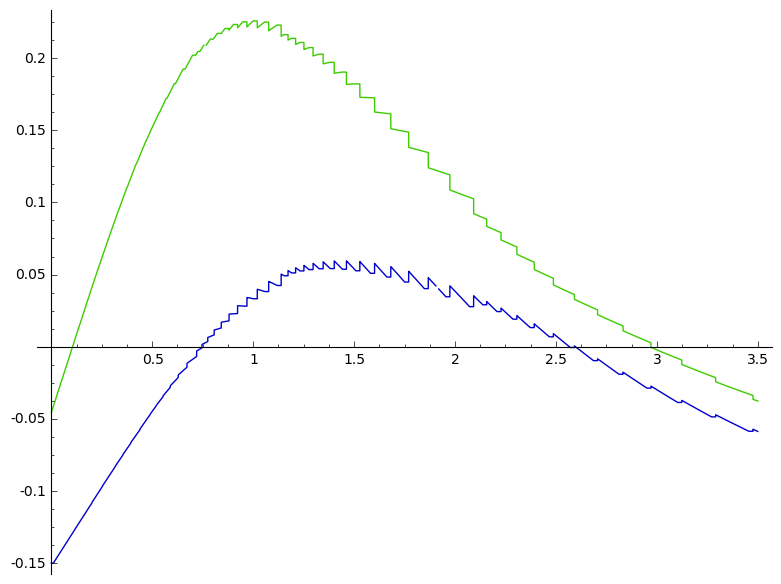

In [27]:
q1 = reach.sage_plot(x - 1.15, (0, 3.5))
q1

In [28]:
roots = reach.roots(P.p, P.dpdt(vf))

In [29]:
[root.str(style='brackets') for root in roots]

['[1.5148465335854002 .. 1.5184870921717868]',
 '[1.5670202576799117 .. 2.3824775508894854]']

In [30]:
reach.symbolic_composition = False

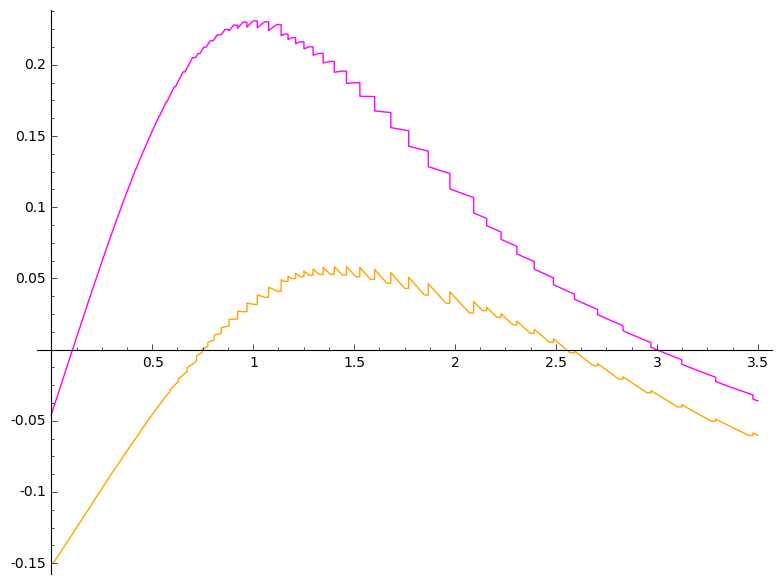

In [31]:
q2 = reach.sage_plot(x - 1.15, (0, 3.5),
                     color=['orange', 'magenta'])
q2

In [32]:
roots = reach.roots(P.p, P.dpdt(vf))

In [33]:
[root.str(style='brackets') for root in roots]

['[1.4390681573910157 .. 2.4772209432575254]']

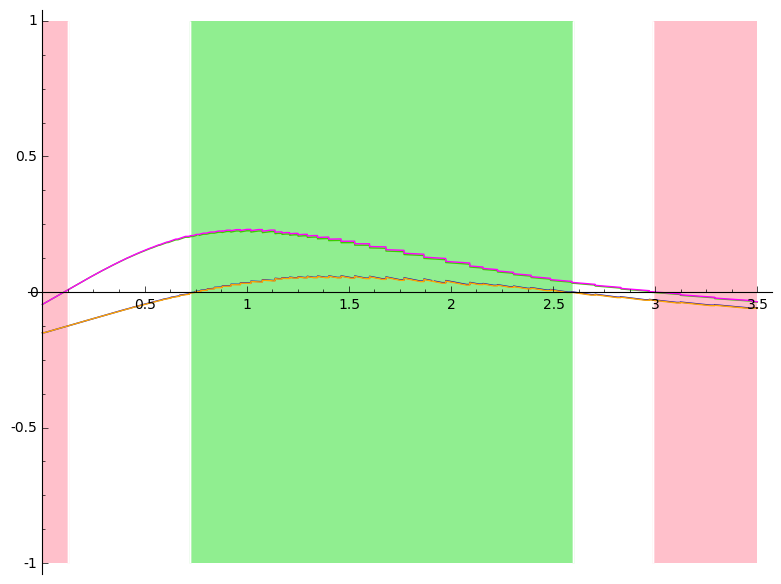

In [34]:
q1 + q2 + sig2.to_domain(RIF(0, 3.5)).plot(aspect_ratio='automatic')

## Context

In [35]:
kwargs = dict(
    order=5, step=(0.01, 0.5),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    verbosity=0,
    epsilon_ctx=0.1,
#    symbolic_composition=True,
)
args = (vf, v3, 7)

In [36]:
{x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)

C({x: [0.050000000000000002 .. 0.10000000000000001]}, G([0.00000000000000000 .. 0.20000000000000002], Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)))

In [37]:
sig = ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 10, **kwargs)

Computed 95 flowpipes in 0.377703905106 sec
Prepared for plotting in 0.210399866104 sec
Computed 11 flowpipes in 0.0687789916992 sec
Prepared for plotting in 0.0339908599854 sec
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = []
  J  = [0.00000000000000000 .. 0.20100000000000002]
f(J) = [2.4434841451205846 .. 25.254926465153240]
Monitored signal 0.00605392456055 sec
Computed 11 flowpipes in 0.0661940574646 sec
Prepared for plotting in 0.0345566272736 sec
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = []
  J  = [0.00000000000000000 .. 0.20100000000000002]
f(J) = [0.36766214382017847 .. 15.704406220249406]
Monitored signal 0.00594401359558 sec
Computed 11 flowpipes in 0.0662410259247 sec
Prepared for plotting in 0.0366427898407 sec
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = [[0.0081983870893337744 .. 0.20199999999900001]]
  J  = [0.00000000000000000 .. 0.0081983870893337745]
f(J) = [0.027748803006220901 .. 8.5064646332237608]
0 at 0.2010000

Prepared for plotting in 0.00412392616272 sec
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = [[0.00000000000000000 .. 0.20199999999900001]]
0 at 0.201000000000001
Monitored signal 0.00449085235596 sec
Computed 3 flowpipes in 0.023197889328 sec
Prepared for plotting in 0.00431299209595 sec
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = [[0.00000000000000000 .. 0.20199999999900001]]
0 at 0.201000000000001
Monitored signal 0.00348091125488 sec
Computed 3 flowpipes in 0.022313117981 sec
Prepared for plotting in 0.00386881828308 sec
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = [[0.00000000000000000 .. 0.20199999999900001]]
0 at 0.201000000000001
Monitored signal 0.0034019947052 sec
Computed 3 flowpipes in 0.025022983551 sec
Prepared for plotting in 0.00345277786255 sec
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = [[0.00000000000000000 .. 0.20199999999900001]]
0 at 0.201000000000001
Monitored signal 0.00370287895203 sec
Computed

limit_output extension: Maximum message size of 10000 exceeded with 11249 characters

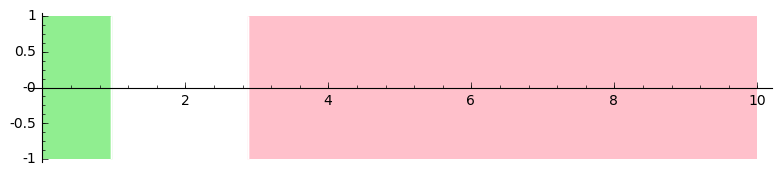

In [38]:
sig.plot()

## Differential Context

In [39]:
{x: RIF(6,7)} % G(RIF(0,0.2), P)

D({x: [6 .. 7]}, G([0.00000000000000000 .. 0.20000000000000002], Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)))

In [40]:
# Use symbolic remainders for context jump 
kwargs['integrationScheme'] = 7

In [41]:
kwargs['verbosity'] = 10

In [64]:
kwargs['symbolic_composition'] = True

In [65]:
sig = ({x: RIF(6)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

Computed 72 flowpipes in 0.31970500946 sec
Prepared for plotting in 0.0634386539459 sec
Flowstar failed!
I  = [0.00000000000000000 .. 6.2841853071795866]
fI = ['[0.99999881254552125 .. 1.3743176832705973]', '[0.011496194198696817 .. 5.0000087847057957]']
C || f(I) = ['[0.99999881254552125 .. 1.3743176832705973]', '[0.011496194198696817 .. 5.0000087847057957]']
     odes = (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y)
D || odes = [0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x + 6, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y]
phi(D || odes, C || f(I)) = None
bisecting [0.00000000000000000 .. 6.2841853071795866] -> [0.00000000000000000 .. 3.1420926535897933], [3.1420926535897932 .. 6.2841853071795866]
Computed 14 flowpipes in 0.0786309242

sig    = Signal([0.00000000000000000 .. 0.0010000000000000001], [])
sig(0) = None
Computed 8 flowpipes in 0.0537769794464 sec
Prepared for plotting in 0.0094997882843 sec
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = [[0.00000000000000000 .. 0.065625000000000003]]
  J  = [0.065625000000000002 .. 0.20100000000000002]
f(J) = [-0.24482444486125385 .. 2.4532826732860885]
Monitored signal 0.0161159038544 sec
sig    = Signal([0.00000000000000000 .. 0.0010000000000000001], [])
sig(0) = None
Computed 8 flowpipes in 0.0530581474304 sec
Prepared for plotting in 0.0121257305145 sec
domain = [0.00000000000000000 .. 0.20100000000000004]
roots = [[0.00000000000000000 .. 0.041299670595727707]]
  J  = [0.041299670595727706 .. 0.20100000000000004]
f(J) = [-0.53508851166161553 .. 2.4605654168350735]
Monitored signal 0.0121011734009 sec
sig    = Signal([0.0000000000

limit_output extension: Maximum message size of 10000 exceeded with 11043 characters

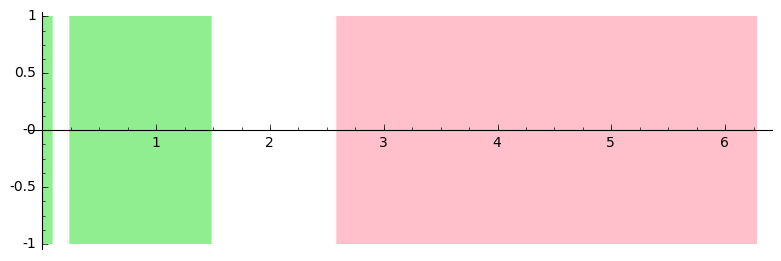

In [66]:
sig.plot()

In [62]:
sig = ({x: RIF(6, 6.1)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

Computed 72 flowpipes in 0.317031145096 sec
Prepared for plotting in 0.0646557807922 sec
Flowstar failed!
I  = [0.00000000000000000 .. 6.2841853071795866]
fI = ['[0.99999881254552125 .. 1.3743176832705973]', '[0.011496194198696817 .. 5.0000087847057957]']
C || f(I) = ['[0.99999881254552125 .. 1.3743176832705973]', '[0.011496194198696817 .. 5.0000087847057957]']
     odes = (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y)
D || odes = [0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x + 6.1?, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y]
phi(D || odes, C || f(I)) = None
bisecting [0.00000000000000000 .. 6.2841853071795866] -> [0.00000000000000000 .. 3.1420926535897933], [3.1420926535897932 .. 6.2841853071795866]
Computed 15 flowpipes in 0.080367

Computed 15 flowpipes in 0.0886471271515 sec
Prepared for plotting in 0.0105316638947 sec
domain = [0.00000000000000000 .. 0.20100000000000004]
roots = [[0.00000000000000000 .. 0.050529067330523009]]
  J  = [0.050529067330523008 .. 0.20100000000000004]
f(J) = [-0.44336906794227338 .. 1.7380254927151773]
Monitored signal 0.0189383029938 sec
sig    = Signal([0.00000000000000000 .. 0.0010000000000000001], [])
sig(0) = None
Computed 15 flowpipes in 0.0851581096649 sec
Prepared for plotting in 0.0087685585022 sec
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = [[0.00000000000000000 .. 0.050930860567069241]]
  J  = [0.050930860567069240 .. 0.20100000000000002]
f(J) = [-0.44207582944931112 .. 1.6563935075083585]
Monitored signal 0.0184721946716 sec
sig    = Signal([0.00000000000000000 .. 0.0010000000000000001], [])
sig(0) = None
Computed 15 flowpipes in 0.0774188041687 sec
Prepared for plotting in 0.0120358467102 sec
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = 

limit_output extension: Maximum message size of 10000 exceeded with 10453 characters

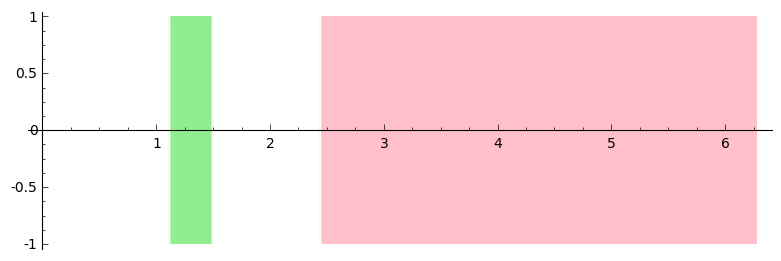

In [63]:
sig.plot()

In [75]:
sig = ({x: RIF(10, 10.05)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 2*pi, **kwargs)

Computed 72 flowpipes in 0.296825170517 sec
Prepared for plotting in 0.0595896244049 sec
Flowstar failed!
I  = [0.00000000000000000 .. 6.2841853071795866]
fI = ['[0.99999881254552125 .. 1.3743176832705973]', '[0.011496194198696817 .. 5.0000087847057957]']
C || f(I) = ['[0.99999881254552125 .. 1.3743176832705973]', '[0.011496194198696817 .. 5.0000087847057957]']
     odes = (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y)
D || odes = [0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x + 10.1?, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y]
phi(D || odes, C || f(I)) = None
bisecting [0.00000000000000000 .. 6.2841853071795866] -> [0.00000000000000000 .. 3.1420926535897933], [3.1420926535897932 .. 6.2841853071795866]
Computed 14 flowpipes in 0.06669

sig(0) = None
Computed 8 flowpipes in 0.0401389598846 sec
Prepared for plotting in 0.0061137676239 sec
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = [[0.00000000000000000 .. 0.031250000000000000]]
  J  = [0.031250000000000000 .. 0.20100000000000002]
f(J) = [-0.75118253679347680 .. 4.0719804058739407]
Monitored signal 0.00827407836914 sec
sig    = Signal([0.00000000000000000 .. 0.0010000000000000001], [])
sig(0) = None
Computed 8 flowpipes in 0.040372133255 sec
Prepared for plotting in 0.0055

limit_output extension: Maximum message size of 10000 exceeded with 12826 characters

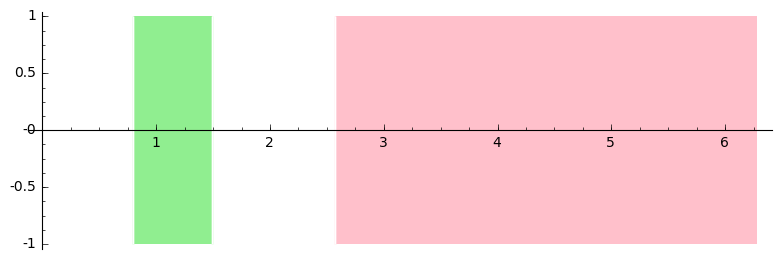

In [76]:
sig.plot()

In [77]:
{x: 1, y: 2}

{y: 2, x: 1}

In [9]:
kxs = [[('x', RIF(1,2)), ('y', RIF(5,6))], [('x', RIF(2,3)), ('y', RIF(6,7))], [('x', RIF(1,2)), ('y', RIF(5,6))], [('x', RIF(2,3)), ('y', RIF(6,7))]]

In [10]:
sorted(kxs)

[[('x', 2.?), ('y', 6.?)],
 [('x', 3.?), ('y', 7.?)],
 [('x', 2.?), ('y', 6.?)],
 [('x', 3.?), ('y', 7.?)]]

In [13]:
sorted(kxs,
       key=lambda xs: [(k, x.endpoints()) for k, x in xs])

[[('x', 2.?), ('y', 6.?)],
 [('x', 2.?), ('y', 6.?)],
 [('x', 3.?), ('y', 7.?)],
 [('x', 3.?), ('y', 7.?)]]